Oasis

V.L.Swathika

Data science internship

Task 2

Business statement : Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force.

During the covid-19 period there was a sharp increase in the unemployment rate.

The aim is to analyze the unemployment rate using python.

Kaggle : https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

In [176]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [177]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Unemployment_Rate_upto_11_2020.csv")
df.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74


In [178]:
df.shape

(267, 9)

In [179]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [180]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [181]:
df.describe(exclude=np.number)

,Region,Date,Frequency,Region.1
count,267,267,267,267
unique,27,10,1,5
top,Andhra Pradesh,31-03-2020,M,North
freq,10,27,267,79


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [183]:
#Removing extra spaces from the columns name
df.columns = df.columns.str.strip()

In [184]:
df['Date'] = df['Date'].astype('datetime64')

In [185]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [186]:
Cat= df.select_dtypes(exclude=np.number)
Num=df.select_dtypes(include=np.number)

In [187]:
Cat.drop(['Date','Frequency'],axis=1,inplace=True)

In [188]:
Cat.columns


Index(['Region', 'Region.1'], dtype='object')

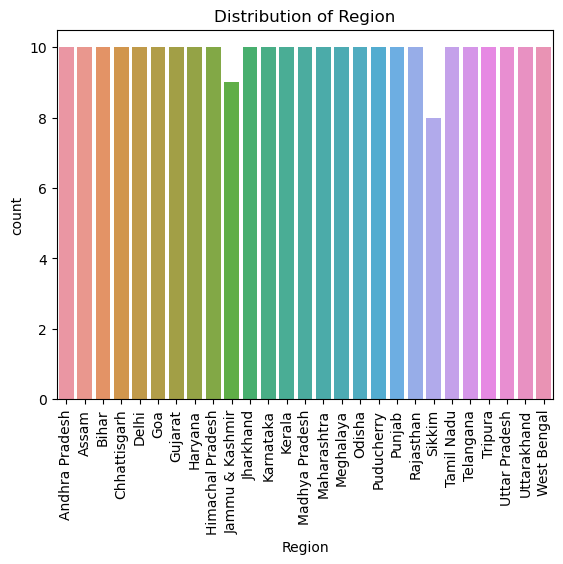

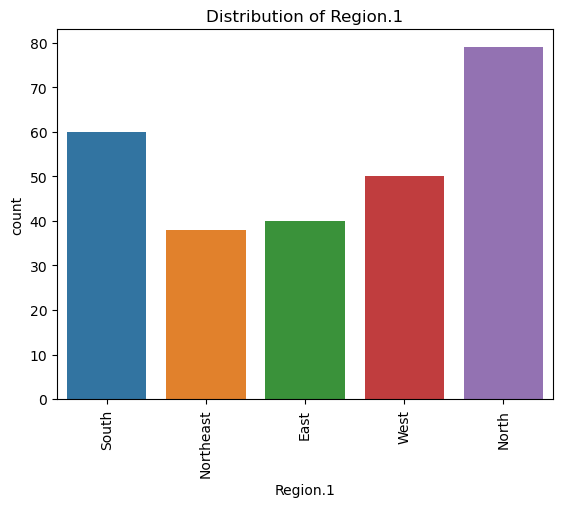

In [189]:
#Uniariate for categorical
for col in Cat.columns:
        sns.countplot(x=col, data=Cat)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
        plt.show()  

In [190]:
#univariate for numerical
Num.columns

Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'longitude', 'latitude'],
      dtype='object')

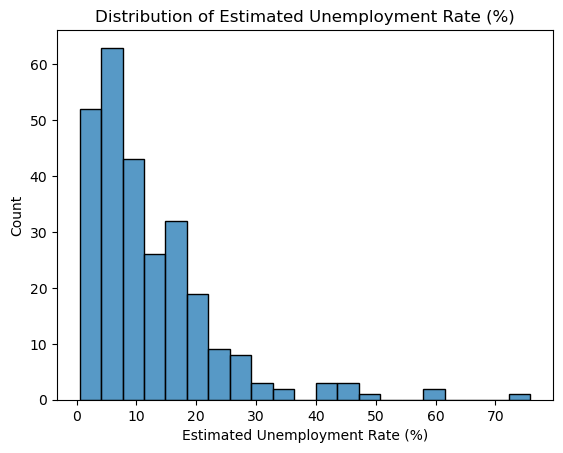

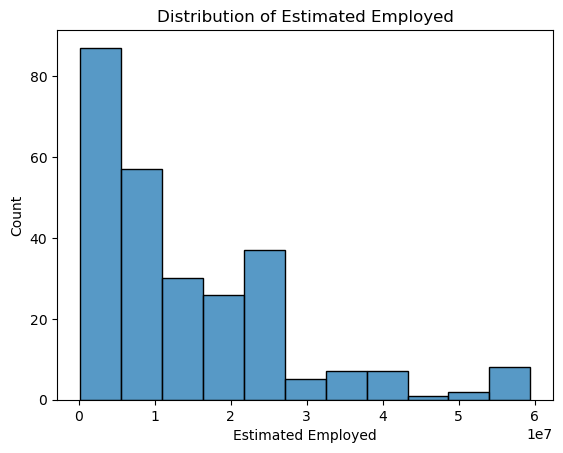

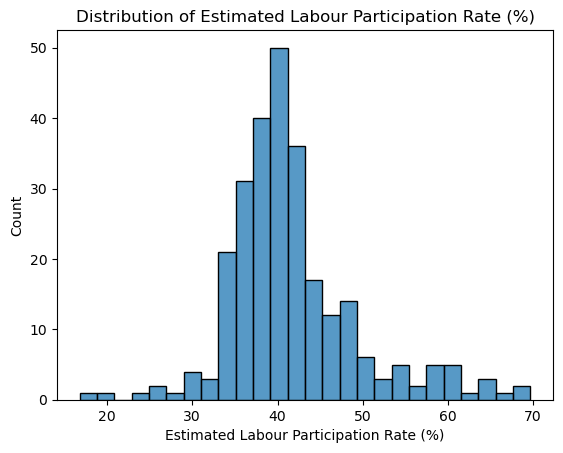

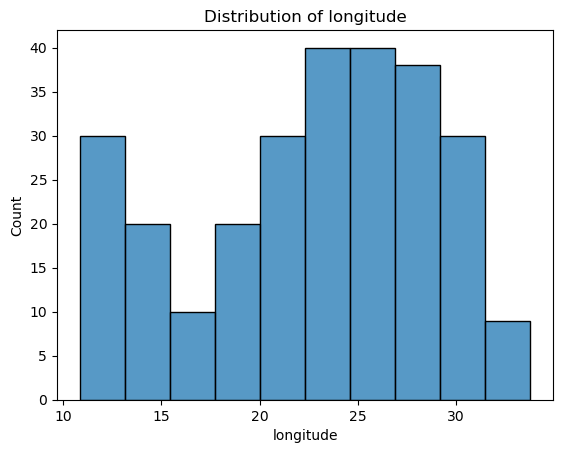

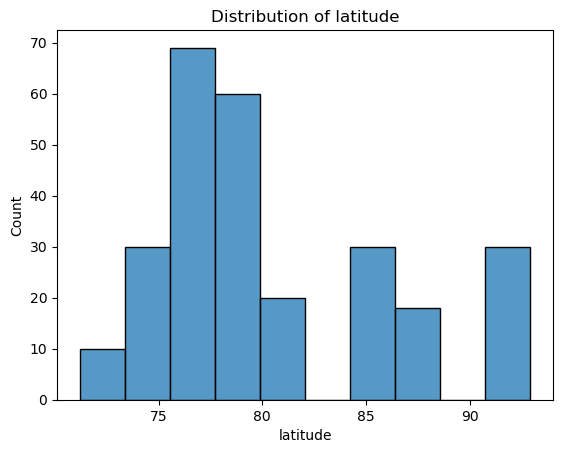

In [191]:
for i in Num.columns:
    sns.histplot(x=Num[i])
    plt.title(f'Distribution of {i}')
    plt.show()


In [192]:
#Dropping date and frequency due to insignificant impact
df.drop(['Frequency'],axis=1,inplace=True)

In [193]:
#Bivariate analysis
df.head(1)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74


In [194]:
df['month_num'] = df['Date'].dt.month

In [195]:
import calendar

df['month'] = df['month_num'].apply(lambda x: calendar.month_abbr[x])

In [196]:
df['Estimated Employed'] = (df['Estimated Employed'] / df['Estimated Employed'].sum()) * 100
df.rename(columns={'Estimated Employed': 'Estimated Employed %'}, inplace=True)
df.head(1)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed %,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,month_num,month
0,Andhra Pradesh,2020-01-31,5.48,0.446246,41.02,South,15.9129,79.74,1,Jan


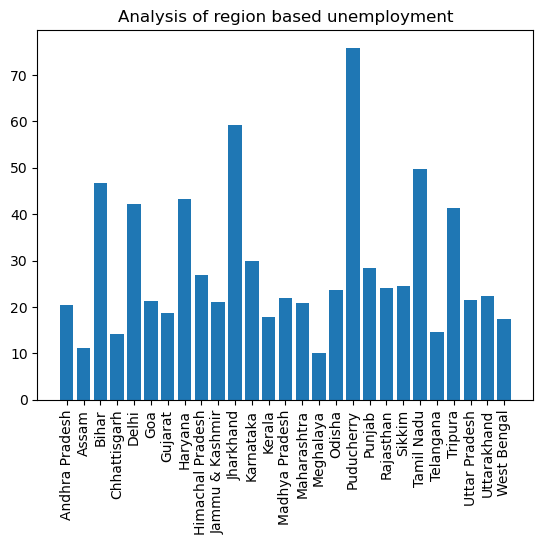

In [150]:
#Cat vs Num
plt.bar(x=df['Region'],height=df['Estimated Unemployment Rate (%)'])
plt.title('Analysis of region based unemployment')
plt.xticks(rotation=90)
plt.show()

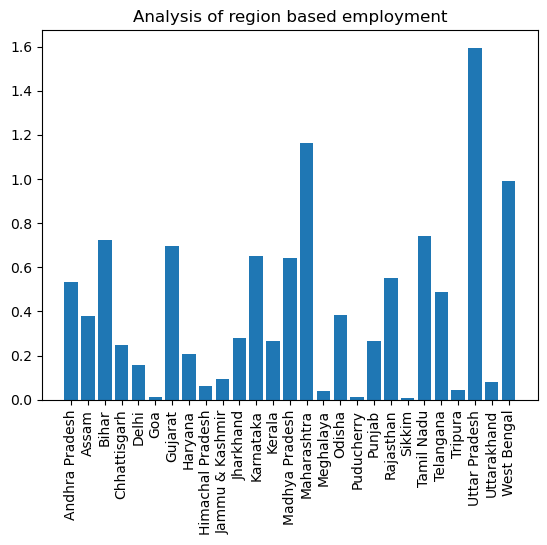

In [171]:
plt.bar(x=df['Region'],height=df['Estimated Employed %'])
plt.title('Analysis of region based employment')
plt.xticks(rotation=90)
plt.show()

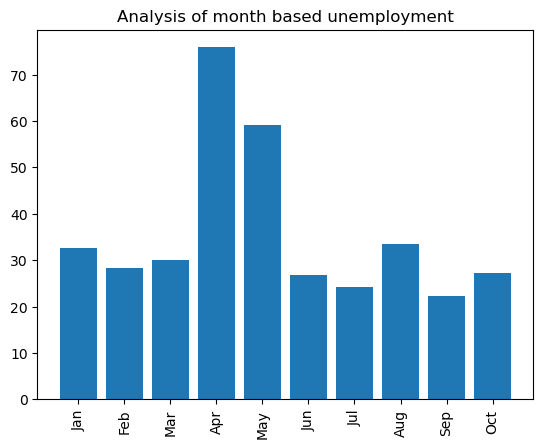

In [206]:
plt.bar(x=df['month'],height=df['Estimated Unemployment Rate (%)'])
plt.title('Analysis of month based unemployment')
plt.xticks(rotation=90)
plt.show()

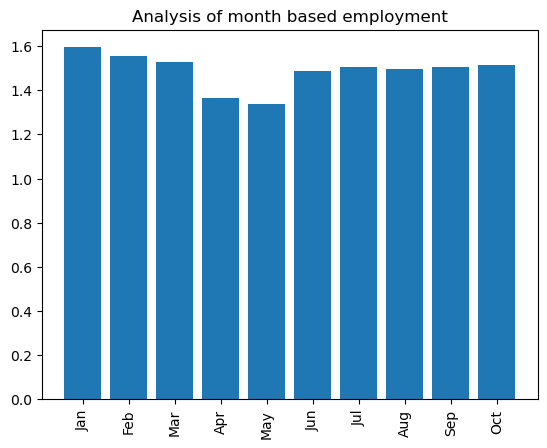

In [207]:
plt.bar(x=df['month'],height=df['Estimated Employed %'])
plt.title('Analysis of month based employment')
plt.xticks(rotation=90)
plt.show()



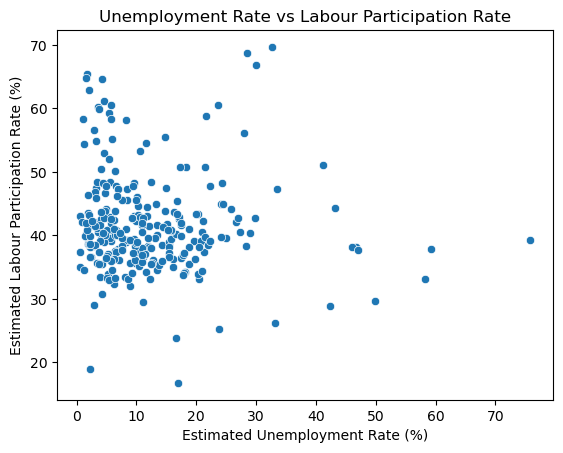

In [210]:
sns.scatterplot(data=df, x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)')
plt.title('Unemployment Rate vs Labour Participation Rate')
plt.show()

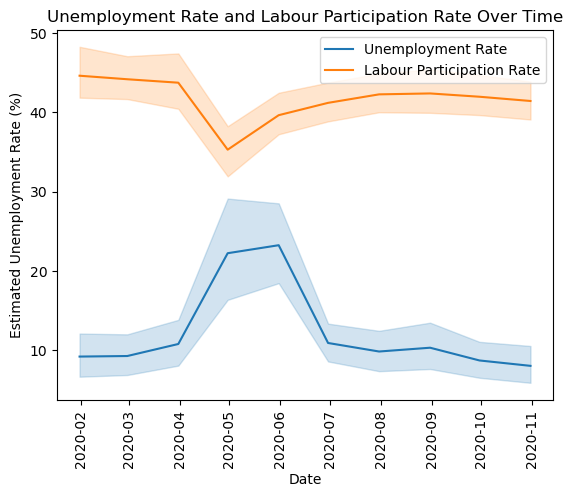

In [213]:
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', label='Unemployment Rate')
sns.lineplot(data=df, x='Date', y='Estimated Labour Participation Rate (%)', label='Labour Participation Rate')
plt.title('Unemployment Rate and Labour Participation Rate Over Time')
plt.xticks(rotation=90)
plt.show()

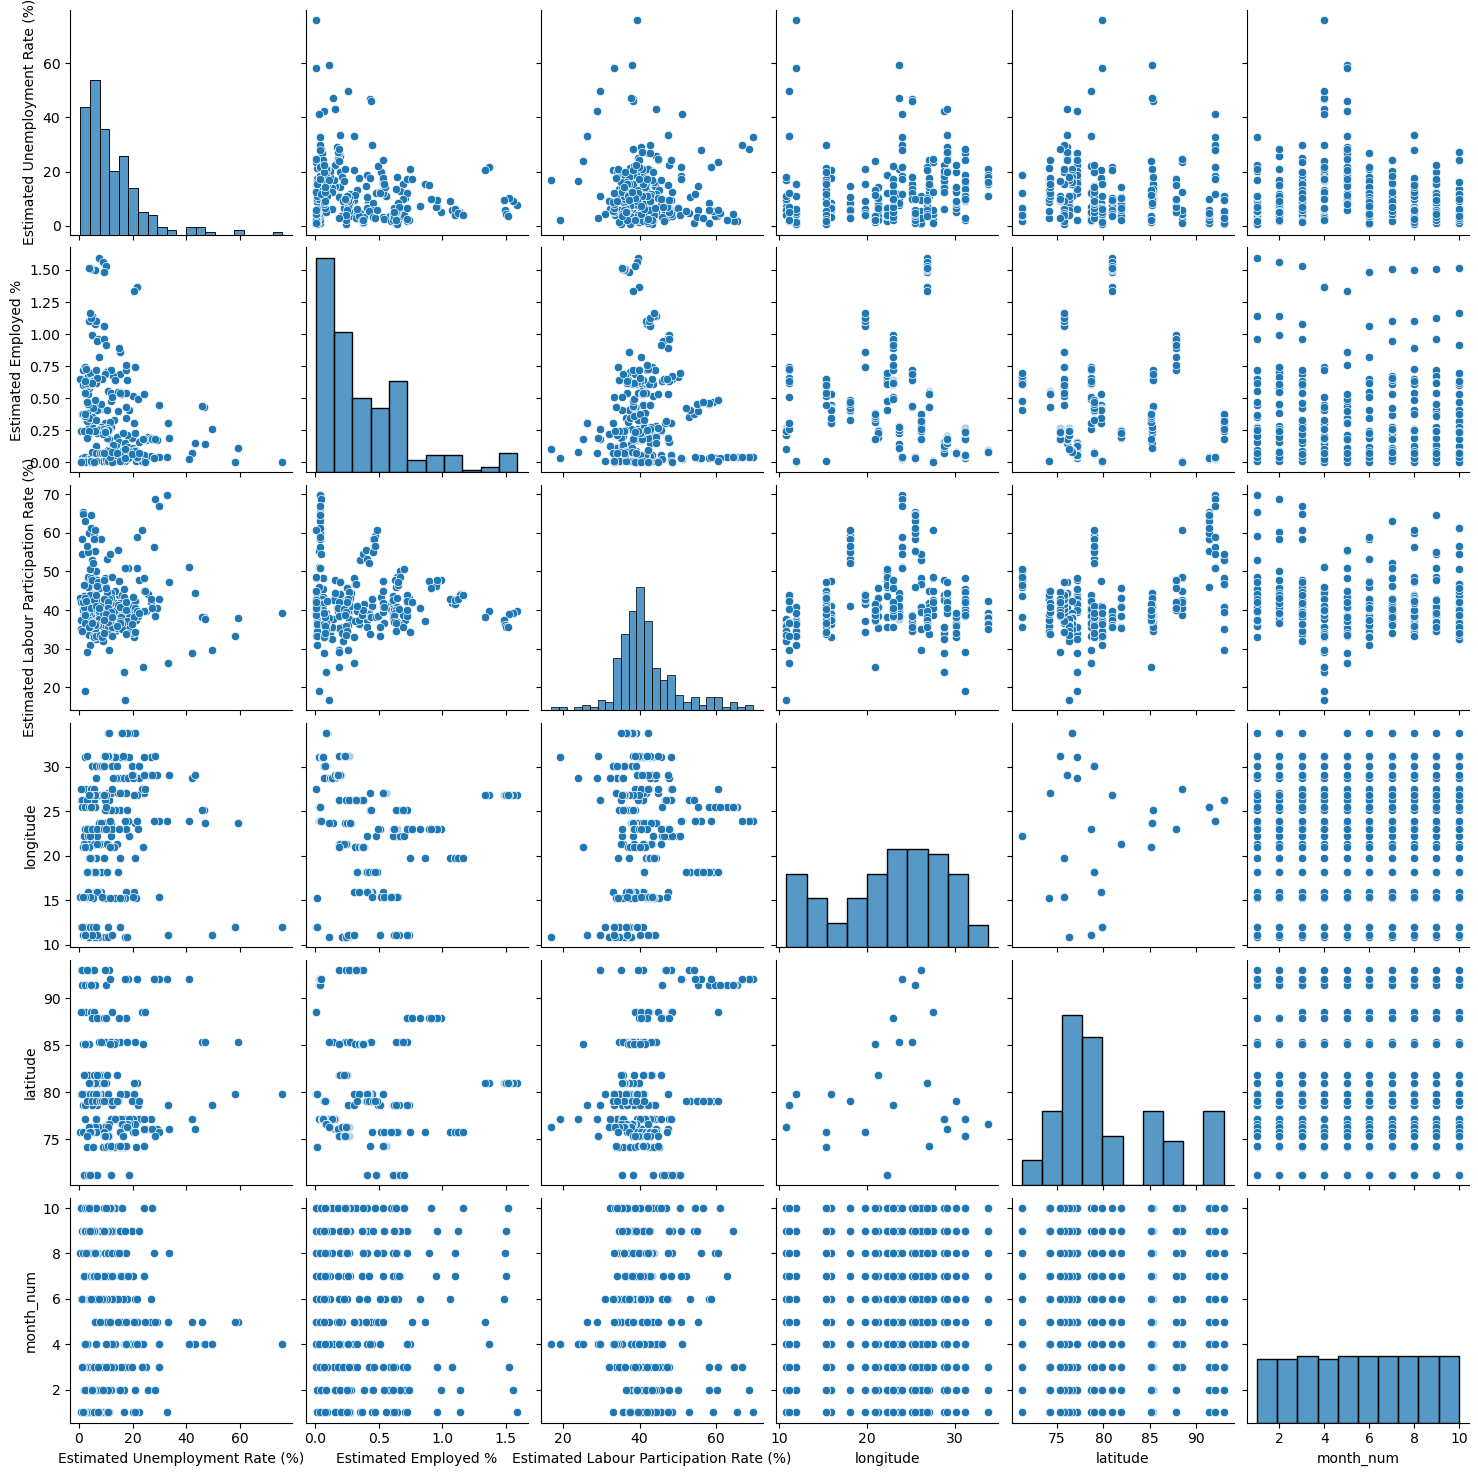

In [214]:
#Multivariate
sns.pairplot(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_17132\2724702665.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



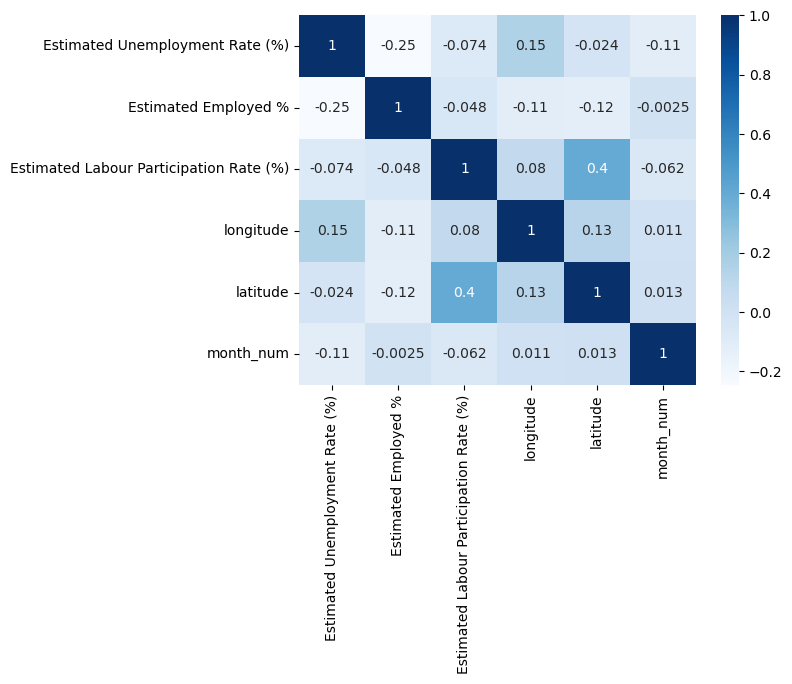

In [226]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

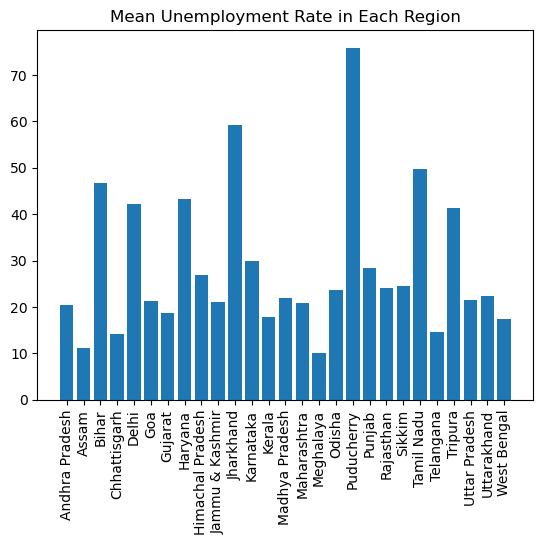

In [236]:
unemployment_mean = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.bar(x=df['Region'], height=df['Estimated Unemployment Rate (%)'])
plt.title('Mean Unemployment Rate in Each Region')
plt.xticks(rotation=90)
plt.show()
